Test:  1
333
test\1\333\g06-031b.png


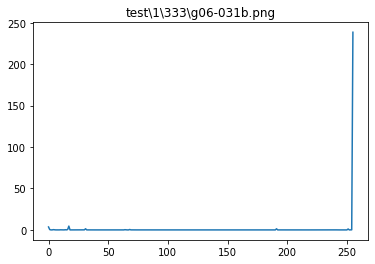

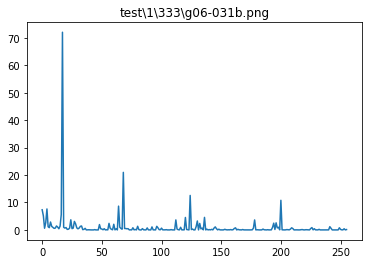

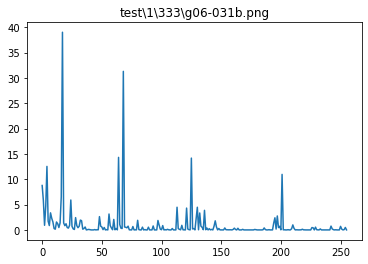

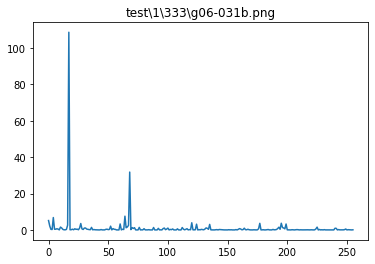

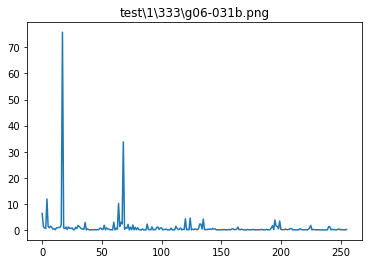

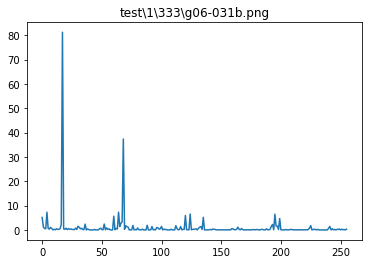

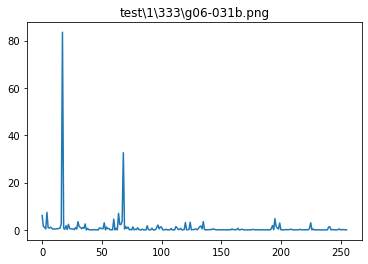

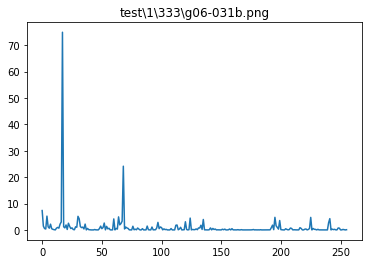

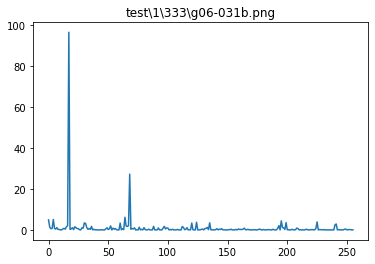

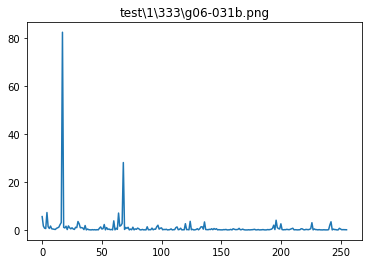

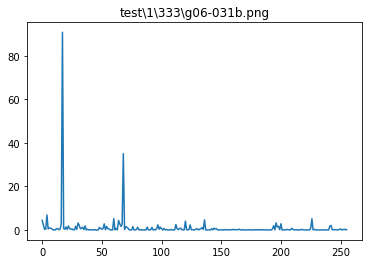

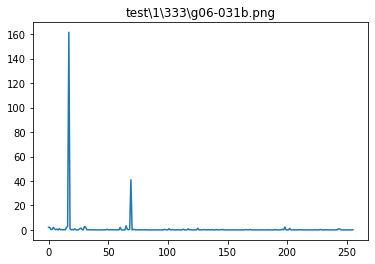

test\1\333\g06-042b.png


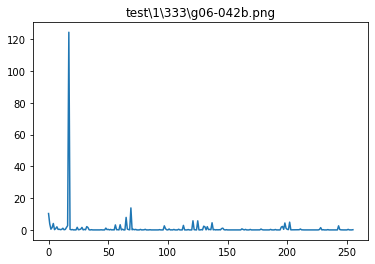

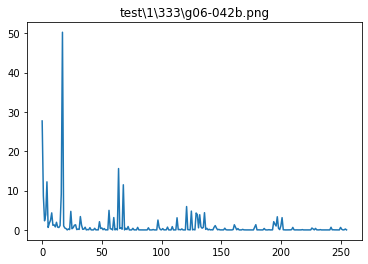

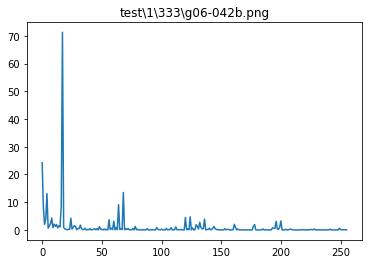

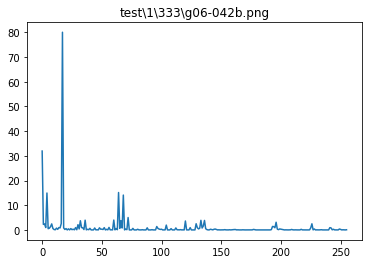

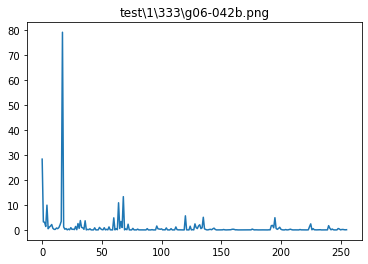

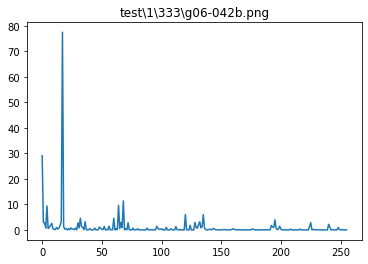

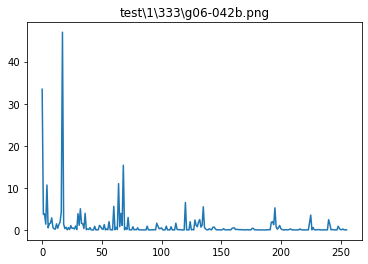

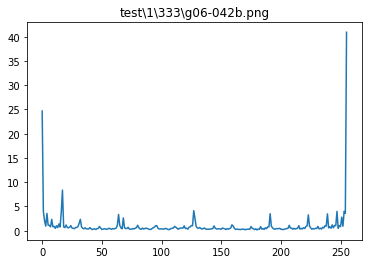

345
test\1\345\g06-045n.png


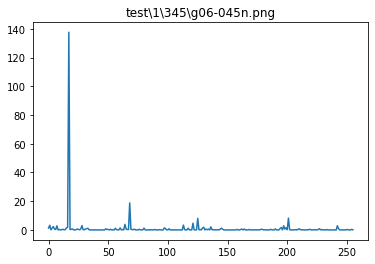

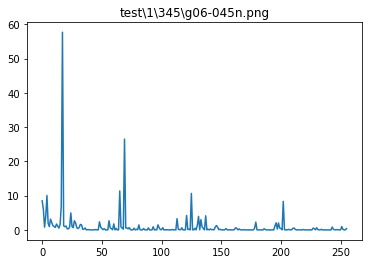

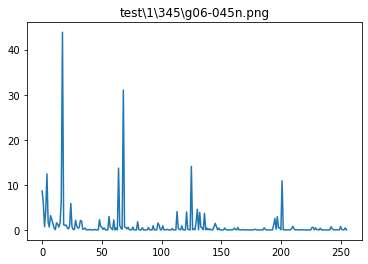

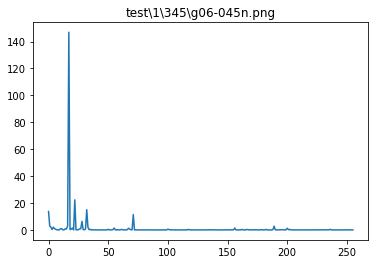

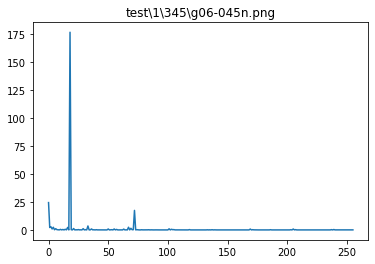

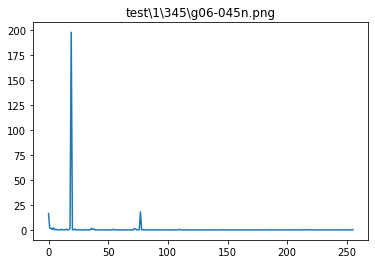

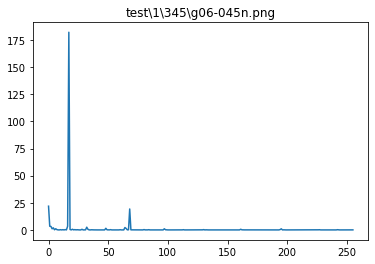

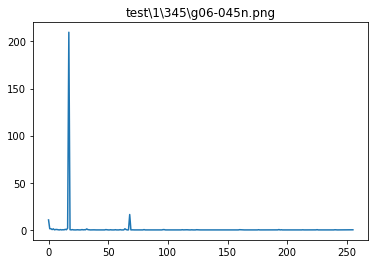

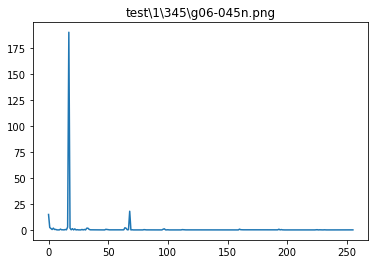

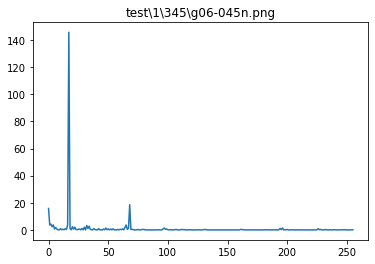

test\1\345\g06-047n.png


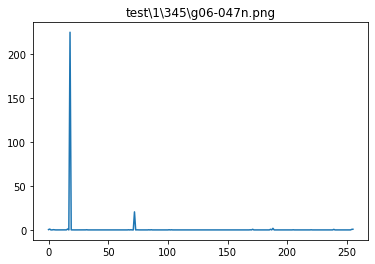

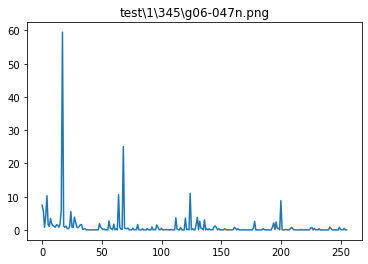

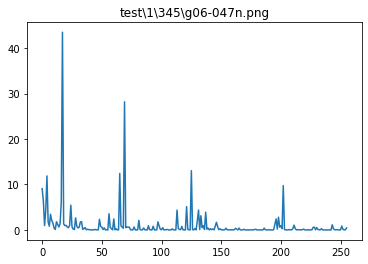

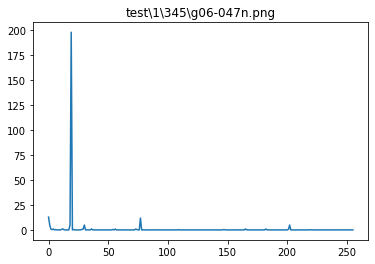

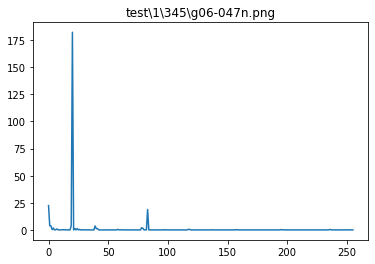

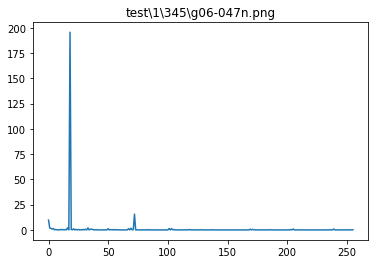

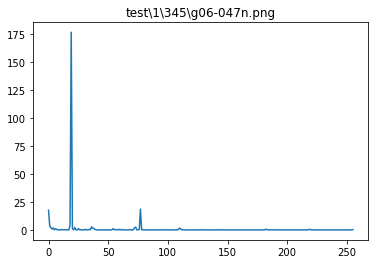

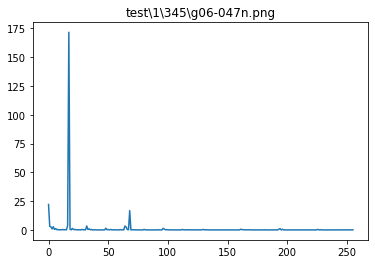

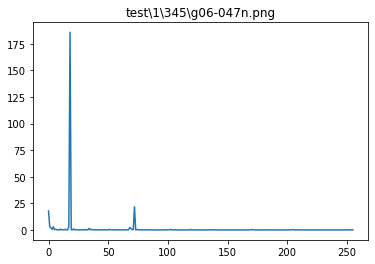

550
test\1\550\m04-238.png


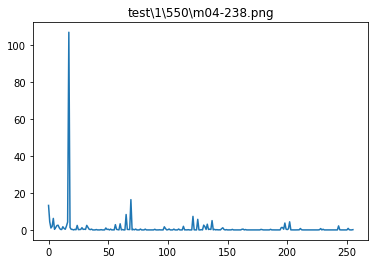

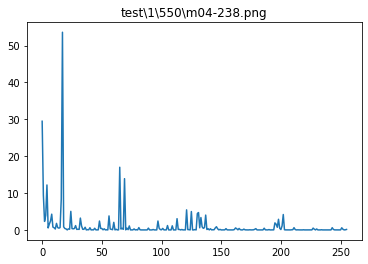

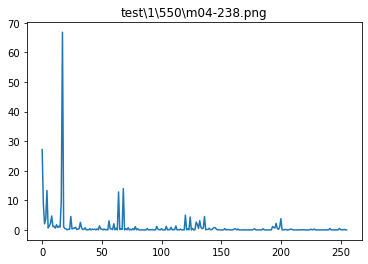

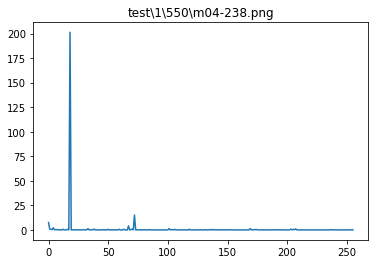

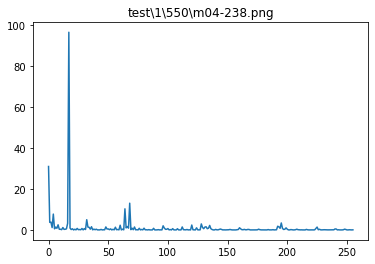

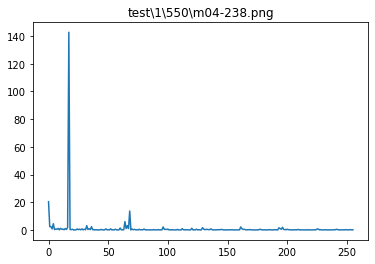

test\1\550\n04-009.png


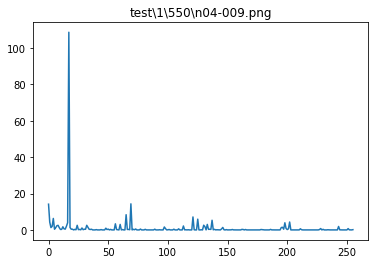

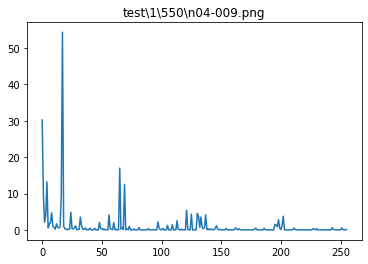

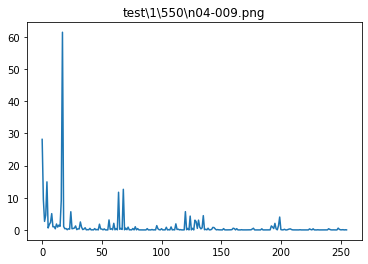

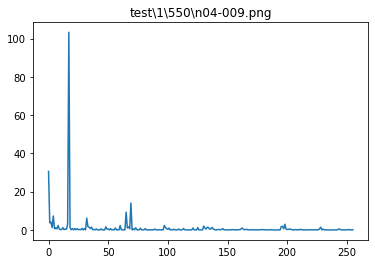

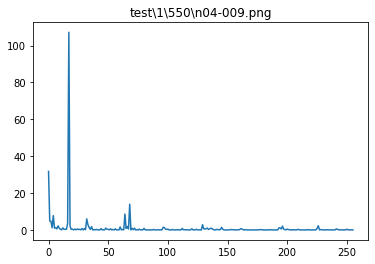

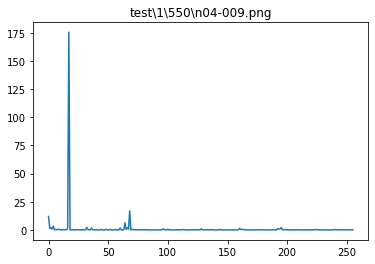

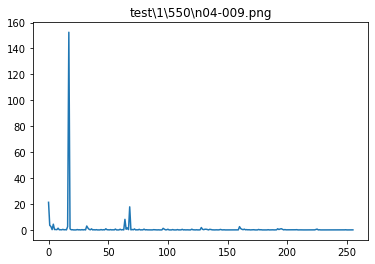

test.png
line 0 presidctions is: 
['333']
line 1 presidctions is: 
['333']
line 2 presidctions is: 
['333']
line 3 presidctions is: 
['345']
line 4 presidctions is: 
['333']
line 5 presidctions is: 
['333']
line 6 presidctions is: 
['333']
Prediction: 333
Time taken: 14.84
Test:  2
333
test\2\333\g06-031b.png


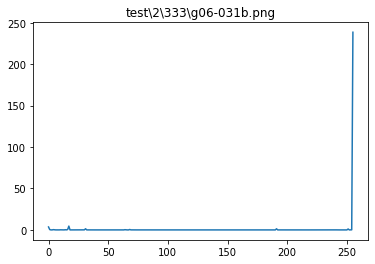

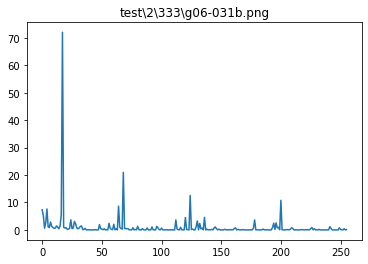

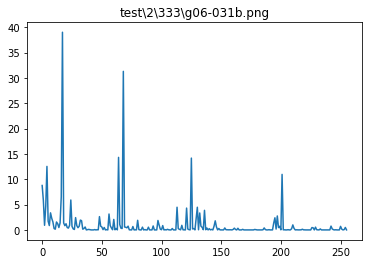

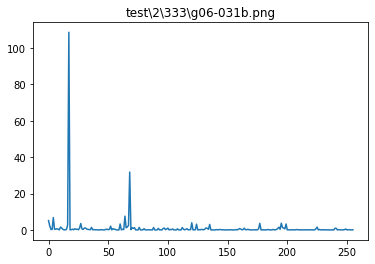

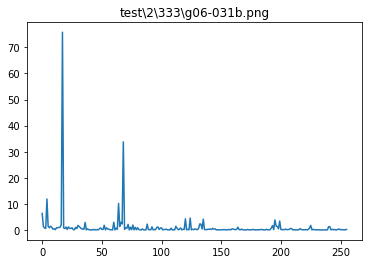

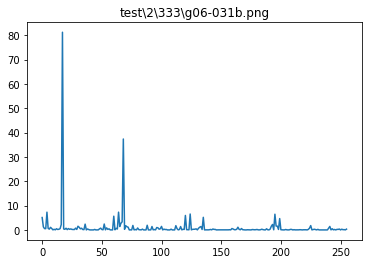

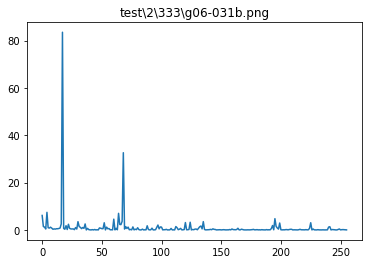

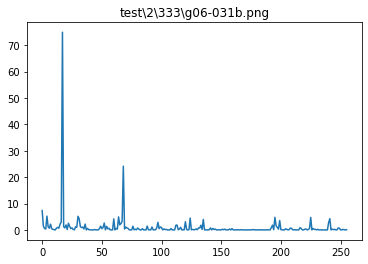

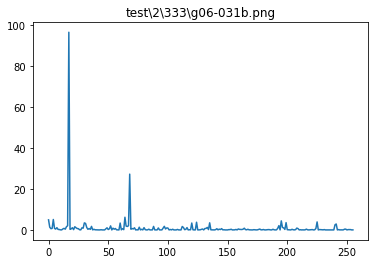

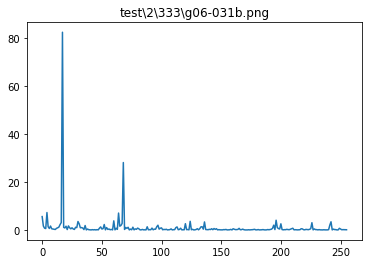

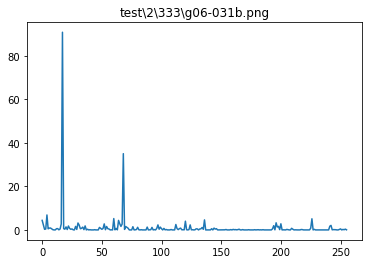

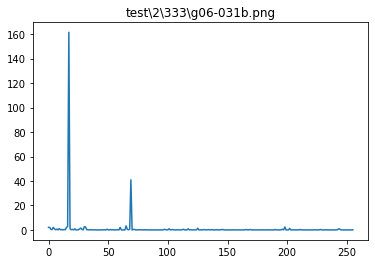

test\2\333\g06-042b.png


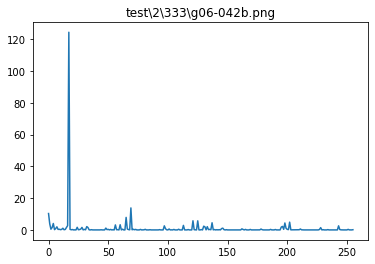

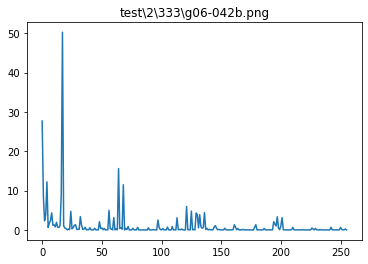

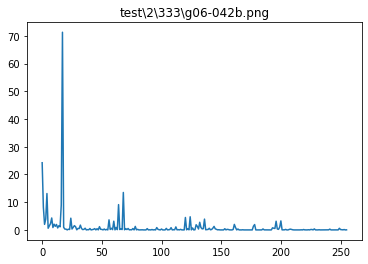

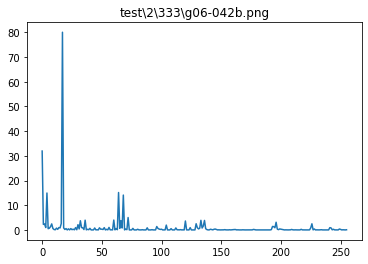

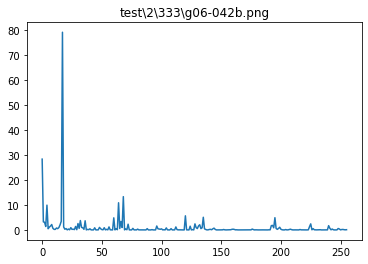

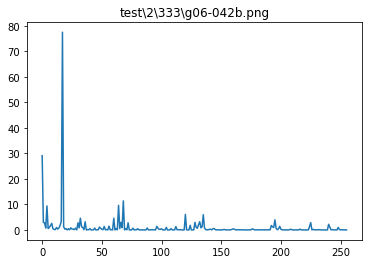

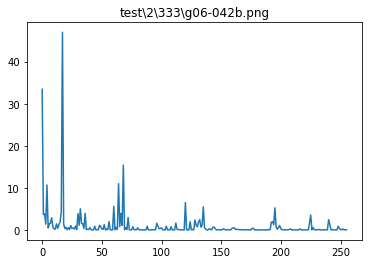

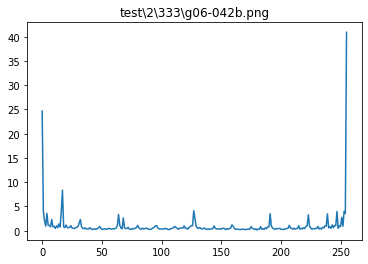

345
test\2\345\g06-045n.png


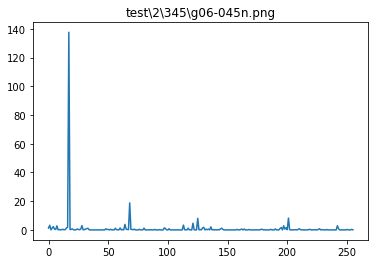

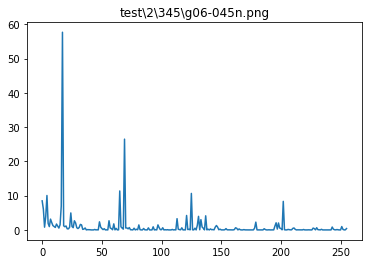

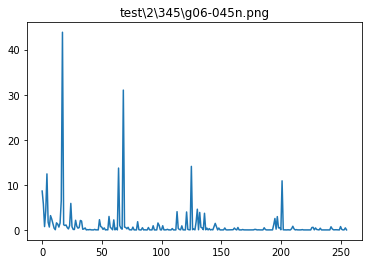

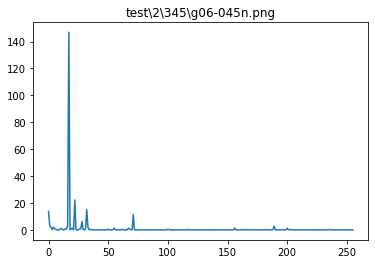

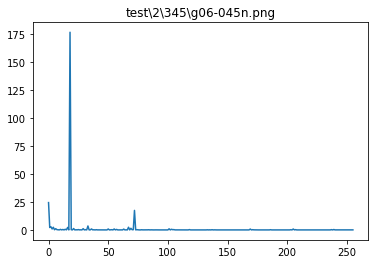

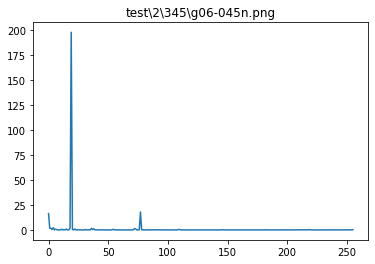

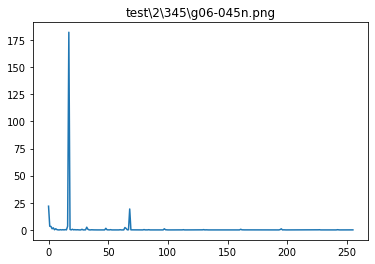

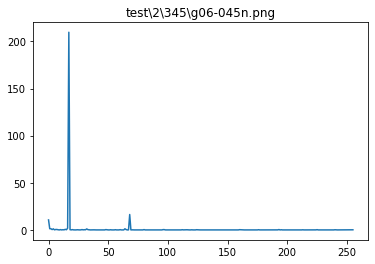

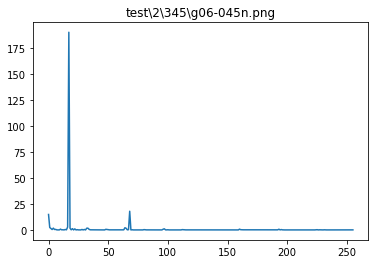

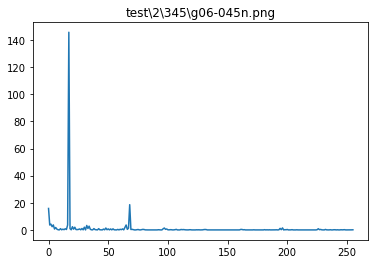

test\2\345\g06-047n.png


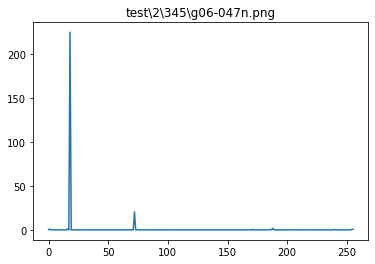

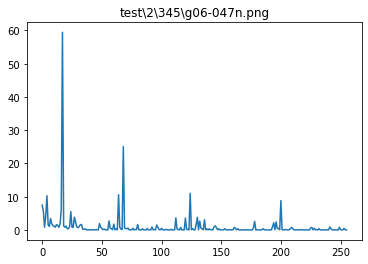

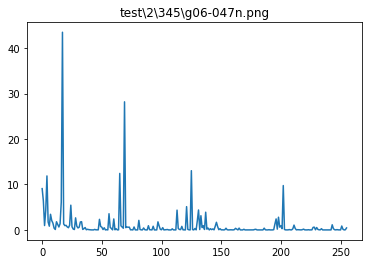

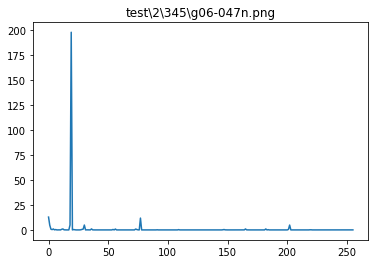

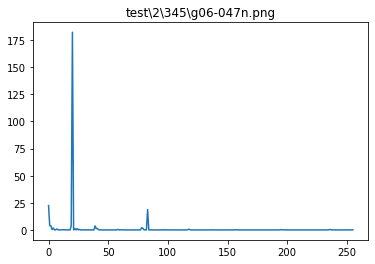

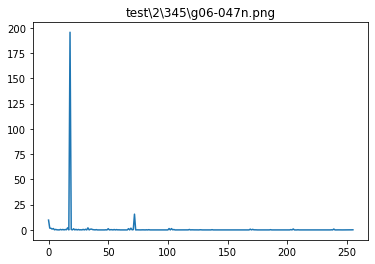

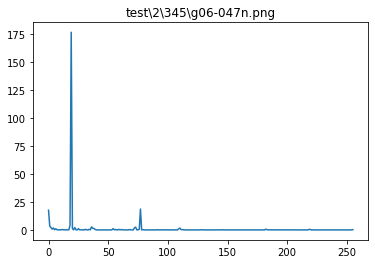

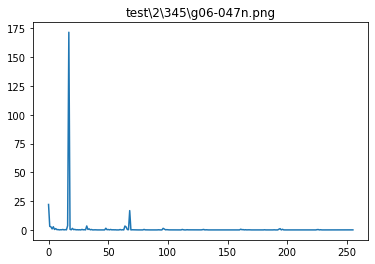

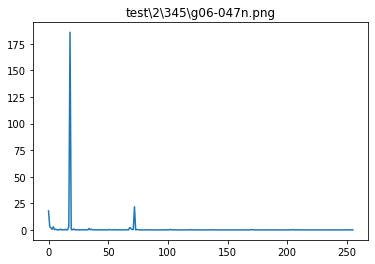

550
test\2\550\m04-238.png


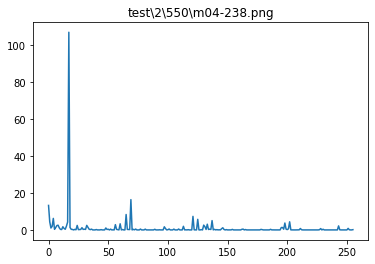

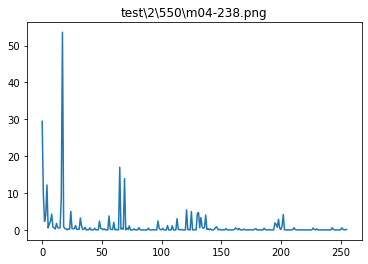

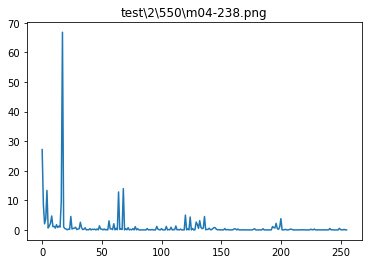

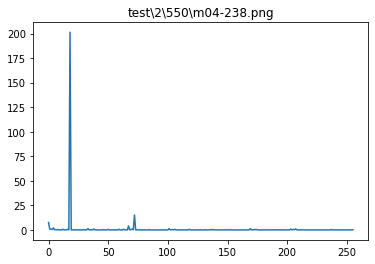

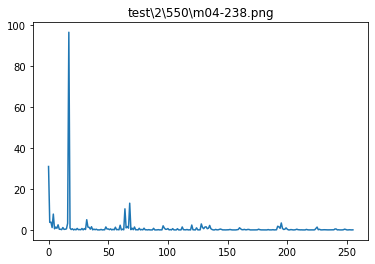

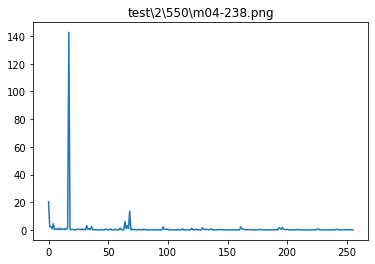

test\2\550\n04-009.png


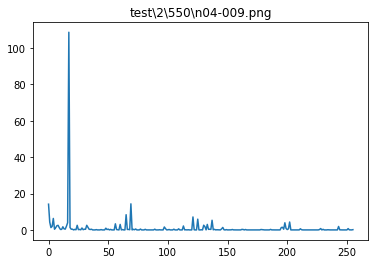

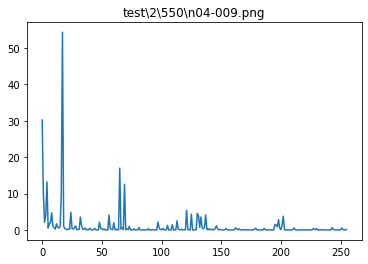

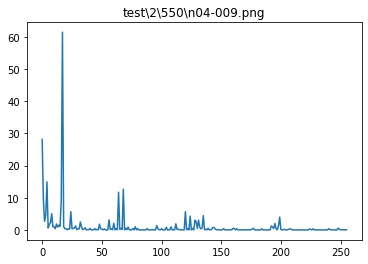

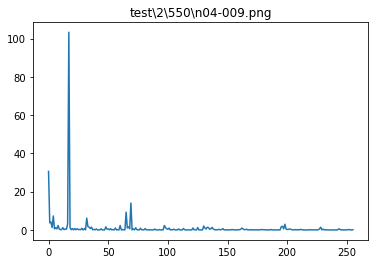

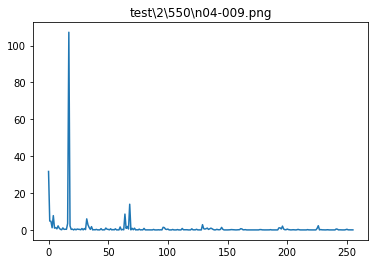

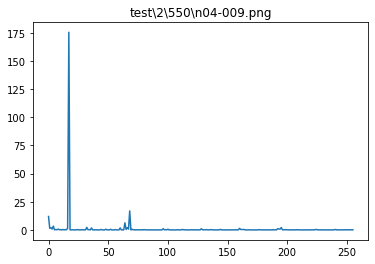

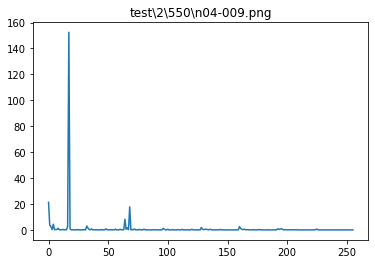

test.png
line 0 presidctions is: 
['333']
line 1 presidctions is: 
['333']
line 2 presidctions is: 
['333']
line 3 presidctions is: 
['333']
line 4 presidctions is: 
['333']
line 5 presidctions is: 
['333']
line 6 presidctions is: 
['333']
line 7 presidctions is: 
['333']
line 8 presidctions is: 
['333']
line 9 presidctions is: 
['333']
Prediction: 333
Time taken: 14.65


In [1]:
from local_binary_pattern import FeatureExtractor
from preprocessing import *
from sklearn.svm import SVC
from imutils import paths
import time
import cv2
import os
from matplotlib import pyplot as plt 


def get_features(root_dir, file, feature_extractor):
    labels = []
    features = []
    for writer in os.listdir(os.path.join(root_dir, file)):
        print(writer)
        for sample in paths.list_images(os.path.join(root_dir, file, writer)):
            print(sample)
            gray = cv2.imread(sample, 0)
            line_boundries = Preprocessor.line_segmentation(Preprocessor.paragraph_extraction(gray))
            Preprocessor.draw_segmented_lines(gray, line_boundries)
            for line in line_boundries:
                lbp = list(feature_extractor.local_binary_pattern(gray[line[0]:line[2],line[1]:line[3]]).ravel())
                hist = feature_extractor.histogram(lbp)
                
                #print(hist)
                plt.plot(hist)
                plt.title(sample)
                plt.show()
                
                labels.append(str(writer))
                features.append(hist)
    return features, labels


def get_prediction(root_dir, file, feature_extractor, model):
    image = cv2.imread(os.path.join(root_dir, file, 'test.png'))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    line_boundries = Preprocessor.line_segmentation(Preprocessor.paragraph_extraction(gray))
    i = 0
    lst = []
    for line in line_boundries:
        if line[2]>line[0] and line[3]>line[1]:
            lbp = list(feature_extractor.local_binary_pattern(gray[line[0]:line[2], line[1]:line[3]]).ravel())
            hist = feature_extractor.histogram(lbp)
            lst.append(model.predict(hist.reshape(1, -1)))
            print("line "+ str(i) + " presidctions is: ")
            print(lst[i])
            i += 1
    return max(lst, key=lst.count)


def main():
    root_dir = 'test'
    time_file = open("time.txt", "w")
    results_file = open("results.txt", "w")
    feature_extractor = FeatureExtractor(8, 3)
    for test in os.listdir(root_dir):
        print("Test: ", test)
        start_time = time.time()
        features, labels = get_features(root_dir, test, feature_extractor)

        model = SVC()
        model.fit(features, labels)

        prediction = get_prediction(root_dir, test, feature_extractor, model)[0]
        time_taken = round(time.time() - start_time, 2)
        print("Prediction: " + prediction)
        print("Time taken: " + str(time_taken))
        results_file.write(prediction + '\n')
        time_file.write(str(time_taken) + '\n')
    results_file.close()
    time_file.close()


if __name__ == '__main__':
    main()
